## 🎓 **Aula sobre: Python e Tendência Central — Variância, Desvio Padrão, Quartis, Boxplot e Retirada de Outliers**

<br>

### 🧭 Sumário da Aula

| # | Sub-tópico                         | Tempo Estimado | Complexidade |
|---|------------------------------------|----------------|--------------|
| 1 | 🧠 Ficha de Revisão Rápida         | ~1 min         | ⭐           |
| 2 | 🔬 Mergulho Profundo               | ~15 min        | ⭐⭐⭐⭐       |
| 3 | 💻 Exemplos de Mercado             | ~10 min        | ⭐⭐⭐        |
| 4 | 🕸️ Profundezas e Conexões          | ~3 min         | ⭐⭐         |
| 5 | 🚀 Ação e Verificação               | ~5 min         | ⭐⭐         |
| 6 | 🌊 Mergulhos Adicionais Opcionais   | Opcional       | ⭐⭐⭐⭐      |

<br>

---
<br>


### 1. 🧠 Ficha de Revisão Rápida | (O Essencial)

<br>

> - **Variância (`var`)**: média dos quadrados das distâncias ao *mean*.  
> - **Desvio Padrão (`std`)**: raiz quadrada da variância, em mesmas unidades dos dados.  
> - **Quartis (`quantile`)**: valores que dividem os dados em quatro partes iguais.  
> - **IQR (Intervalo Interquartílico)**: `Q3 − Q1`, base para detecção de outliers.  
> - **Boxplot**: gráfico que mostra `Q1`, `Q2` (mediana), `Q3`, e “bigodes” até 1.5×IQR.

<br>


### 2. 🔬 Mergulho Profundo | (Os Detalhes)

<br>

#### **🎯 O Conceito Central**  
- **Variância** mede dispersão ao quadrado, valorizando desvios grandes.  
- **Desvio Padrão** retorna à escala original para interpretar dispersão.  
- **Quartis**:  
  - **Q1** = 25º percentil (25% dos dados ≤ Q1)  
  - **Q2** = mediana (50º percentil)  
  - **Q3** = 75º percentil  
- **Outliers** são pontos abaixo de `Q1 − 1.5×IQR` ou acima de `Q3 + 1.5×IQR`.  
- **Boxplot** sintetiza esses conceitos num único gráfico: caixa de quartis e “bigodes” de detecção.

<br>

#### **🔗 Analogia de Data Science**  
É como medir a regularidade de alturas num grupo: a média dá o “tamanho médio”, o desvio mostra a variação típica, os quartis dividem o grupo em quatro níveis, e o boxplot mostra quem está muito acima ou abaixo do padrão.

<br>


### **💻 Exemplos de Mercado (Abrangentes)**


#### **Nível Simples: Calculando Variância e Desvio Padrão**


In [ ]:
import pandas as pd

# “Leia CSV de fevereiro 2021.”
df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')

# “Selecione a coluna delivery_fee.”
fees = df['delivery_fee']

# “Calcule variância e desvio padrão.”
var_fee = fees.var()
std_fee = fees.std()

print(f"Variância: {var_fee:.2f}, Desvio Padrão: {std_fee:.2f}")


In [2]:
# Pratique seu código aqui!
import pandas as pd

df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')
fees = df['delivery_fee']

In [4]:
fees.head()

,delivery_fee
0,3.99
1,7.99
2,11.99
3,16.49
4,11.99


In [7]:
var_fee = fees.var()
std_fee = fees.std()
print(f"Variância: {var_fee:.2f}, Desvio Padrão: {std_fee:.2f}")

Variância: 18.63, Desvio Padrão: 4.32


* **O que o código faz:**  

  **1) Explicação Linha a Linha (Diálogo com o Código):**  
  ```python
  # “Importe pandas para manipular tabelas.”  
  import pandas as pd  

  # “Carregue o arquivo de dados.”  
  df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')  

  # “Extraia a série de taxas de entrega.”  
  fees = df['delivery_fee']  

  # “Calcule a variância (dispersion ao quadrado).”  
  var_fee = fees.var()  

  # “Calcule o desvio padrão (escala original).”  
  std_fee = fees.std()  

  # “Imprima resultados com duas casas decimais.”  
  print(f"Variância: {var_fee:.2f}, Desvio Padrão: {std_fee:.2f}")  
  ```

  **2) Tabela de Estados Intermediários:**

  ```markdown
  | Passo | Expressão            | Saída    | O que faz?                          |
  |:-----:|:---------------------|:---------|:------------------------------------|
  | 1     | `fees.var()`         | float    | Retorna variância da série          |
  | 2     | `fees.std()`         | float    | Retorna desvio padrão da série      |
  ```

  **3) Diagrama Mental (A Analogia Central):**  
  Imagine medir o quanto cada fatia de pizza (delivery_fee) se afasta do tamanho médio (mean), elevando ao quadrado pra penalizar diferenças grandes, e depois tirar raiz pra voltar ao tamanho original.

* **Cenário de Mercado:**  
  - Em **finanças de delivery**, entender dispersão de taxas ajuda definir políticas de frete dinâmico: alta variabilidade sugere promoções para suavizar picos.

* **Boas Práticas:**  
  - **Afirmação:** “Compare `std` com média para avaliar coeficiente de variação.”  
    - **Porquê:** `std/mean` indica dispersão relativa, útil para comparar variáveis com escalas diferentes.  
    - **Analogia:** É como comparar variabilidade de alturas de adultos e crianças ajustando pela média de cada grupo.


#### **Nível Intermediário: Quartis, IQR e Detecção de Outliers**


In [ ]:
import pandas as pd

# “Leia dados.”
df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')
fees = df['delivery_fee']

# “Calcule Q1, Q2 (mediana) e Q3.”
Q1 = fees.quantile(0.25)
Q2 = fees.quantile(0.50)
Q3 = fees.quantile(0.75)
IQR = Q3 - Q1

# “Máscara de outliers.”
mask_out = (fees < (Q1 - 1.5 * IQR)) | (fees > (Q3 + 1.5 * IQR))
outliers = fees[mask_out]

print(f"Q1: {Q1}, Mediana: {Q2}, Q3: {Q3}, IQR: {IQR}")
print(f"Outliers encontrados: {len(outliers)}")


In [10]:
# Pratique seu código aqui!
import pandas as pd

df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')
fees = df['delivery_fee']

In [11]:
Q1 = fees.quantile(0.25)
Q2 = fees.quantile(0.50)
Q3 = fees.quantile(0.75)

IQR = Q3 - Q1

In [12]:
mask_out = (fees < (Q1 - 1.5 * IQR)) | (fees > (Q3 + 1.5 * IQR))
mask_out

,delivery_fee
0,False
1,False
2,False
3,False
4,False
...,...
406394,False
406395,False
406396,False
406397,False


In [14]:
outliers = fees[mask_out]
outliers

,delivery_fee
100,20.00
133,20.00
669,18.00
854,20.00
929,17.99
...,...
404956,21.99
405005,20.00
405854,18.00
406050,18.00


In [15]:
print(f"Q1: {Q1}, Mediana: {Q2}, Q3: {Q3}, IQR: {IQR}")
print(f"Outliers encontrados: {len(outliers)}")

Q1: 4.0, Mediana: 6.0, Q3: 9.49, IQR: 5.49
Outliers encontrados: 2023


* **O que o código faz:**  

  **1) Explicação Linha a Linha (Diálogo com o Código):**  
  ```python
  # “Importe pandas.”  
  import pandas as pd  

  # “Carregue a coluna de fees.”  
  df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')
  fees = df['delivery_fee']

  # “Calcule primeiro, segundo e terceiro quartis.”  
  Q1 = fees.quantile(0.25)
  Q2 = fees.quantile(0.50)
  Q3 = fees.quantile(0.75)

  # “Compute IQR como diferença Q3-Q1.”  
  IQR = Q3 - Q1

  # “Crie máscara para valores fora de 1.5×IQR.”  
  mask_out = (fees < (Q1 - 1.5 * IQR)) | (fees > (Q3 + 1.5 * IQR))
  outliers = fees[mask_out]

  # “Mostre quartis, IQR e quantidade de outliers.”  
  print(f"Q1: {Q1}, Mediana: {Q2}, Q3: {Q3}, IQR: {IQR}")
  print(f"Outliers encontrados: {len(outliers)}")
  ```  

  **2) Tabela de Estados Intermediários:**

  ```markdown
  | Passo  | Expressão                | Saída     | O que faz?                              |
  |:------:|:-------------------------|:----------|:----------------------------------------|
  | 1      | `fees.quantile(…)`       | float     | Calcula quartis                        |
  | 2      | `IQR = Q3 - Q1`          | float     | Intervalo interquartílico               |
  | 3      | `mask_out`               | Series booleana | Marca outliers                       |
  | 4      | `outliers`               | Series    | Lista de valores atípicos               |
  ```

  **3) Diagrama Mental (A Analogia Central):**  
  Pense em um campo de futebol dividido em quatro faixas de largura iguais; as bolinhas (fees) que caem muito para fora das faixas intermediárias são sinalizadas como “fora do jogo” (outliers).

* **Cenário de Mercado:**  
  - Em **engenharia de dados**, detectar outliers de taxa de entrega evita métricas enviesadas que poderiam levar a decisões incorretas de preço dinâmico.

* **Boas Práticas:**  
  - **Afirmação:** “Sempre visualize quartis antes de remover outliers.”  
    - **Porquê:** Garante entender distribuição e não descartar dados válidos.  
    - **Analogia:** É como inspecionar uma amostra de frutas antes de retirar as estragadas.


#### **Nível Avançado: Boxplot e Remoção de Outliers**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# “Leia dados.”
df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')
fees = df['delivery_fee']

# “Desenhe boxplot.”
plt.figure(figsize=(6,4))
plt.boxplot(fees.dropna(), vert=False, patch_artist=True)
plt.title('Boxplot de delivery_fee')
plt.xlabel('delivery_fee')
plt.show()

# “Remova outliers via IQR.”
Q1, Q3 = fees.quantile([0.25,0.75])
IQR = Q3 - Q1
filtered = fees[~((fees < Q1 - 1.5*IQR) | (fees > Q3 + 1.5*IQR))]

print(f"Registros antes: {len(fees)}, após remoção: {len(filtered)}")


In [17]:
# Pratique seu código aqui!
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')
fees = df['delivery_fee']
fees.head()


,delivery_fee
0,3.99
1,7.99
2,11.99
3,16.49
4,11.99


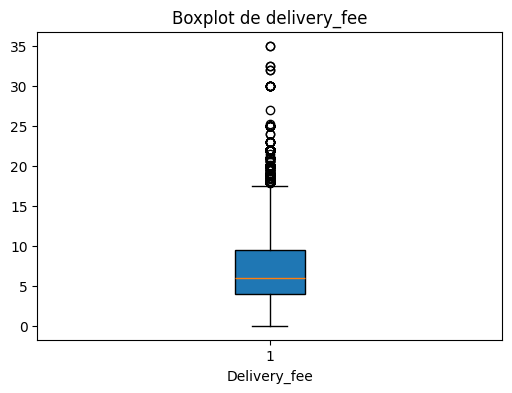

In [19]:
plt.figure(figsize=(6,4))
plt.boxplot(fees.dropna(), vert=True, patch_artist=True)
plt.title("Boxplot de delivery_fee")
plt.xlabel("Delivery_fee")
plt.show()

In [20]:
Q1, Q3 = fees.quantile([0.25,0.75])
IQR = Q3 - Q1
filtered = fees[~((fees < Q1 - 1.5*IQR) | (fees > Q3 + 1.5*IQR))]

print(f"Registros antes: {len(fees)}, após remoção: {len(filtered)}")

Registros antes: 406399, após remoção: 404376


In [22]:
filtered.head()

,delivery_fee
0,3.99
1,7.99
2,11.99
3,16.49
4,11.99


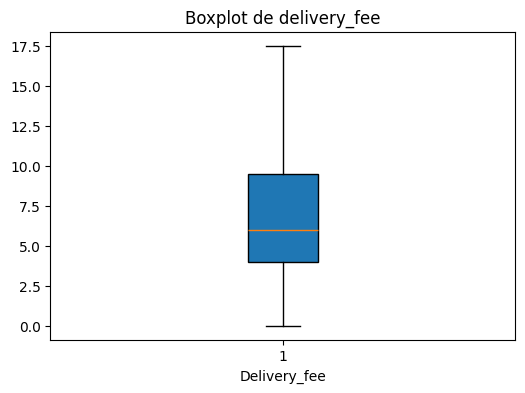

In [23]:
plt.figure(figsize=(6,4))
plt.boxplot(filtered.dropna(), vert=True, patch_artist=True)
plt.title("Boxplot de delivery_fee")
plt.xlabel("Delivery_fee")
plt.show()

* **O que o código faz:**  

  **1) Explicação Linha a Linha (Diálogo com o Código):**  
  ```python
  # “Importe pandas e pyplot.”  
  import pandas as pd  
  import matplotlib.pyplot as plt  

  # “Carregue a série de fees.”  
  df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')
  fees = df['delivery_fee']

  # “Crie figura de 6×4 e plote boxplot horizontal.”  
  plt.figure(figsize=(6,4))
  plt.boxplot(fees.dropna(), vert=False, patch_artist=True)
  plt.title('Boxplot de delivery_fee')
  plt.xlabel('delivery_fee')
  plt.show()

  # “Calcule Q1, Q3 e IQR novamente.”  
  Q1, Q3 = fees.quantile([0.25,0.75])
  IQR = Q3 - Q1

  # “Filtre valores dentro de 1.5×IQR.”  
  filtered = fees[~((fees < Q1 - 1.5*IQR) | (fees > Q3 + 1.5*IQR))]

  # “Compare tamanho antes e depois.”  
  print(f"Registros antes: {len(fees)}, após remoção: {len(filtered)}")
  ```

  **2) Tabela de Estados Intermediários:**

  ```markdown
  | Passo         | Expressão               | Saída      | O que faz?                             |
  |:-------------:|:------------------------|:-----------|:---------------------------------------|
  | 1             | `plt.boxplot(...)`      | Gráfico    | Exibe quartis e outliers visualmente    |
  | 2             | `filtered`              | Series     | Series sem outliers                     |
  ```

  **3) Diagrama Mental (A Analogia Central):**  
  É como usar uma peneira visual: o boxplot mostra pedrinhas grandes (outliers) que você remove e fica só com areia uniforme.

* **Cenário de Mercado:**  
  - Em **análise de performance**, remover outliers de tempo de entrega melhora precisão de SLAs e previsões.

* **Boas Práticas:**  
  - **Afirmação:** “Plot boxplot antes de filtrar.”  
    - **Porquê:** Visualizar garante não remover dados válidos.  
    - **Analogia:** É como inspecionar grãos antes de usar dissolvente.


#### **Nível DEUS (1/3): Remoção Avançada de Outliers com IQR e Z-Score**


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')
fees = df['delivery_fee'].dropna()

# IQR
Q1, Q3 = fees.quantile([0.25,0.75])
IQR = Q3 - Q1
mask_iqr = (fees >= Q1 - 1.5*IQR) & (fees <= Q3 + 1.5*IQR)

# Z-Score
z = np.abs(stats.zscore(fees))
mask_z = z < 3

# Combine masks
clean = fees[mask_iqr & mask_z]
print(f"Antes: {len(fees)}, Após IQR+Z: {len(clean)}")


In [24]:
# Pratique seu código aqui!
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')
fees = df['delivery_fee'].dropna()


In [26]:
Q1, Q2 = fees.quantile([0.25, 0.75])
IQR = Q3 - Q1
mask_iqr = (fees >= Q1 - 1.5*IQR) & (fees <= Q3 + 1.5*IQR)
mask_iqr.head()

,delivery_fee
0,True
1,True
2,True
3,True
4,True


In [28]:
z = np.abs(stats.zscore(fees))
z

array([0.65215498, 0.27466988, 1.20149473, ..., 1.57666278, 0.27698694,
       0.50869315])

In [30]:
mask_z = z < 3
mask_z

array([ True,  True,  True, ...,  True,  True,  True])

In [31]:
clean = fees[mask_iqr & mask_z]
print(f"Antes: {len(fees)}, Após IQR+Z: {len(clean)}")

Antes: 406399, Após IQR+Z: 404376


* **O que o código faz:**  

  **1) Explicação Linha a Linha (Diálogo com o Código):**  
  ```python
  # “Importe pandas, numpy e stats.”  
  import pandas as pd  
  import numpy as np  
  from scipy import stats  

  # “Carregue taxas sem nulos.”  
  df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')
  fees = df['delivery_fee'].dropna()

  # “Crie máscara IQR.”  
  Q1, Q3 = fees.quantile([0.25,0.75])
  IQR = Q3 - Q1
  mask_iqr = (fees >= Q1 - 1.5*IQR) & (fees <= Q3 + 1.5*IQR)

  # “Crie máscara Z-score <3σ.”  
  z = np.abs(stats.zscore(fees))
  mask_z = z < 3

  # “Combine filtros e conte.”  
  clean = fees[mask_iqr & mask_z]
  print(f"Antes: {len(fees)}, Após IQR+Z: {len(clean)}")
  ```  

  **2) Tabela de Estados Intermediários:**

  ```markdown
  | Passo     | Expressão              | Saída   | O que faz?                            |
  |:---------:|:-----------------------|:--------|:--------------------------------------|
  | 1         | `mask_iqr`             | booleana| Filtra via IQR                        |
  | 2         | `mask_z`               | booleana| Filtra via Z-score                    |
  | 3         | `clean`                | Series  | Combina e remove outliers             |
  ```

  **3) Diagrama Mental (A Analogia Central):**  
  É como passar grãos por duas peneiras: primeira filtra os que estão muito longe da caixa central (IQR) e a segunda remove os que sobram fora de 3 desvios padrão.

* **Cenário de Mercado:**  
  - Em **detecção de fraude**, combinação de métodos reduz falsos positivos e negativos na identificação de transações anômalas.

* **Boas Práticas:**  
  - **Afirmação:** “Combine métodos para maior robustez.”  
    - **Porquê:** Cada técnica captura diferentes tipos de anomalias.  
    - **Analogia:** É como usar detector de metais e raio-X juntos em segurança.


#### **Nível DEUS (2/3): Winsorize de Quartis e Reavaliação de Estatísticas**


In [ ]:
import pandas as pd
from scipy.stats.mstats import winsorize
import numpy as np

df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')
fees = df['delivery_fee'].dropna().values

# Winsorize limites de 5%
w = winsorize(fees, limits=[0.05,0.05])

orig_var = np.var(fees, ddof=1)
win_var = np.var(w, ddof=1)
print(f"Variância original: {orig_var:.2f}, após winsorize: {win_var:.2f}")


In [32]:
# Pratique seu código aqui!
import pandas as pd
from scipy.stats.mstats import winsorize
import numpy as np

df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')
fees = df['delivery_fee'].dropna().values


* **O que o código faz:**  

  **1) Explicação Linha a Linha (Diálogo com o Código):**  
  ```python
  # “Importe pandas, winsorize e numpy.”  
  import pandas as pd  
  from scipy.stats.mstats import winsorize  
  import numpy as np  

  # “Carregue taxas e remova nulos.”  
  df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')
  fees = df['delivery_fee'].dropna().values

  # “Aplique winsorize em 5% extremos.”  
  w = winsorize(fees, limits=[0.05,0.05])

  # “Calcule variância antes e depois.”  
  orig_var = np.var(fees, ddof=1)
  win_var = np.var(w, ddof=1)

  # “Imprima comparativo.”  
  print(f"Variância original: {orig_var:.2f}, após winsorize: {win_var:.2f}")
  ```  

  **2) Tabela de Estados Intermediários:**

  ```markdown
  | Passo       | Expressão                | Saída   | O que faz?                                |
  |:-----------:|:-------------------------|:--------|:------------------------------------------|
  | 1           | `winsorize(...,limits)` | array   | Limita extremos aos percentis 5%/95%      |
  | 2           | `np.var(...,ddof=1)`    | float   | Compara variâncias após capping           |
  ```

  **3) Diagrama Mental (A Analogia Central):**  
  É como aparar as pontas das fatias extremas antes de medir a dispersão das demais.

* **Cenário de Mercado:**  
  - Em **monitoramento de KPIs**, winsorização mantém a maioria dos dados enquanto suaviza picos de ruído.

* **Boas Práticas:**  
  - **Afirmação:** “Use winsorize quando quiser preservação completa da amostra.”  
    - **Porquê:** Evita reduzir tamanho de amostra ao descartar extremos.  
    - **Analogia:** É como arredondar valores extremos em vez de eliminá-los.


#### **Nível DEUS (3/3): Bootstrap para Estimar Desvio Padrão com Outliers Removidos**


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')
fees = df['delivery_fee'].dropna().values

# Remoção IQR
Q1, Q3 = np.percentile(fees, [25,75])
IQR = Q3 - Q1
fees_clean = fees[(fees >= Q1 - 1.5*IQR) & (fees <= Q3 + 1.5*IQR)]

# Bootstrap de desvio padrão
boot_stds = [np.std(np.random.choice(fees_clean, len(fees_clean), replace=True), ddof=1)
             for _ in range(1000)]
ci = np.percentile(boot_stds, [2.5,97.5])

print(f"Desvio padrão 95% CI: [{ci[0]:.2f}, {ci[1]:.2f}]")


In [ ]:
# Pratique seu código aqui!


* **O que o código faz:**  

  **1) Explicação Linha a Linha (Diálogo com o Código):**  
  ```python
  # “Importe pandas e numpy.”  
  import pandas as pd  
  import numpy as np  

  # “Carregue taxas e remova nulos.”  
  df = pd.read_csv('/content/ifood-restaurants-february-2021.csv')
  fees = df['delivery_fee'].dropna().values

  # “Filtre outliers via IQR.”  
  Q1, Q3 = np.percentile(fees, [25,75])
  IQR = Q3 - Q1
  fees_clean = fees[(fees >= Q1 - 1.5*IQR) & (fees <= Q3 + 1.5*IQR)]

  # “Para 1000 reamostragens, calcule desvio padrão.”  
  boot_stds = [
    np.std(np.random.choice(fees_clean, len(fees_clean), replace=True), ddof=1)
    for _ in range(1000)
  ]

  # “Percentis para CI.”  
  ci = np.percentile(boot_stds, [2.5,97.5])
  print(f"Desvio padrão 95% CI: [{ci[0]:.2f}, {ci[1]:.2f}]")
  ```  

  **2) Tabela de Estados Intermediários:**

  ```markdown
  | Passo        | Expressão                      | Saída        | O que faz?                           |
  |:------------:|:-------------------------------|:-------------|:-------------------------------------|
  | 1            | `fees_clean`                   | array        | Dados sem outliers                   |
  | 2            | `boot_stds`                    | lista floats | Distribuição bootstrap de std        |
  | 3            | `np.percentile(...,[2.5,97.5])`| array floats | CI do desvio padrão                  |
  ```

  **3) Diagrama Mental (A Analogia Central):**  
  É como calcular muitas vezes a variabilidade de um lote filtrado para ver quão confiável é nossa medida de dispersão.

* **Cenário de Mercado:**  
  - Em **monitoramento de qualidade**, estimar incerteza de variabilidade de tempos de resposta com confiança estatística.

* **Boas Práticas:**  
  - **Afirmação:** “Use bootstrap para CI de estatísticas robustas.”  
    - **Porquê:** Não depende de pressupostos de normalidade.  
    - **Analogia:** É como ensaiar repetidas medições para avaliar precisão de um instrumento.


### 3. 🕸️ Profundezas e Conexões

<br>

Métricas de dispersão e outliers são fundamentais para **análise exploratória**, **feature engineering** (remoção de ruído) e **modelos robustos** em **scikit-learn**, **statsmodels** e **scipy**.

<br>

---
<br>


### 4. 🚀 Ação e Verificação

<br>

#### **🤔 Desafio Prático**
1. Calcule variância e desvio padrão de `delivery_fee`.  
2. Determine quartis e IQR, conte outliers.  
3. Gere boxplot e filtre outliers via IQR.  
4. Combine IQR e Z-score para limpeza avançada.  
5. Bootstrap CI de desvio padrão pós-remoção.

<br>

#### **❓ Pergunta de Verificação**
Por que a remoção de outliers impacta mais a variância do que a mediana?  

<br>

---
<br>
